# Seasonality testing via first difference of the ACF

This notebook presents a simple analytical method for identifying seasonality in a time series. The basic idea is to use local maxima in the ACF to identify the period of the seasonality.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from statsmodels.tsa.stattools import acf
from statsmodels.tsa.statespace.tools import diff

In [2]:
plt.rcParams["figure.figsize"] = [16, 5]
sns.set(style="whitegrid", color_codes=True)

In [3]:
def plot_series(x, series_name):
    plt.plot(x)
    plt.title(series_name)
    plt.tight_layout()
    plt.show()

def plot_acf(x_acf, lags):
    plt.plot(x_acf)
    plt.axhline(y=0, linestyle="--", color="gray")
    plt.axhline(y=1.96 / np.sqrt(len(x_acf)), linestyle="--", color="gray")
    plt.axhline(y=-1.96 / np.sqrt(len(x_acf)), linestyle="--", color="gray")
    plt.title("Autocorrelation function")
    plt.xlabel("Lags")
    plt.ylabel("Correlation")
    plt.tight_layout()
    plt.show()

def plot_first_diff(x_d1):
    plt.plot(x_d1)
    plt.axhline(y=0, linestyle="--", color="gray")
    plt.title("First difference")
    plt.xlabel("Lags")
    plt.ylabel("First difference")
    plt.tight_layout()
    plt.show()
    
def find_seasonality(series_name, series_index, lags):
    x = pd.read_csv(f"../data/{series_name}.csv", header=0, usecols=[series_index]).squeeze("columns")
    x_acf = acf(x, nlags=lags, fft=False)
    x_d1 = diff(x_acf)

    plt.figure(0)
    plot_series(x, series_name)
    plt.figure(1)
    plot_acf(x_acf, lags)
    plt.figure(2)
    plot_first_diff(x_d1)


---

## Arrivals from Australia (monthly)

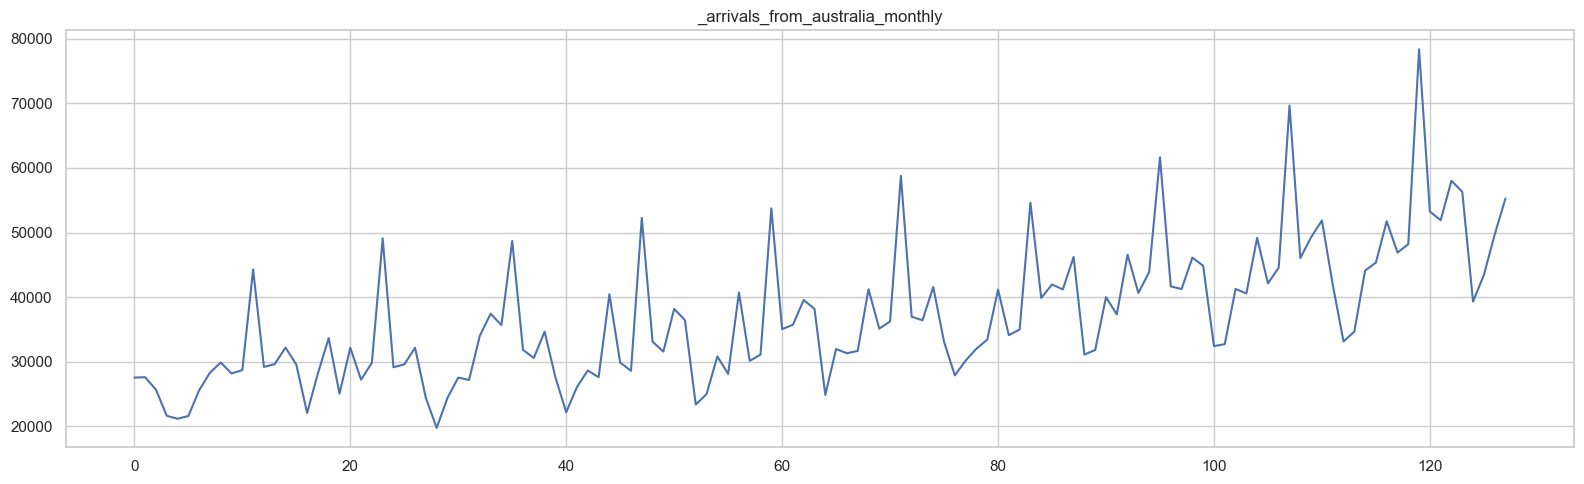

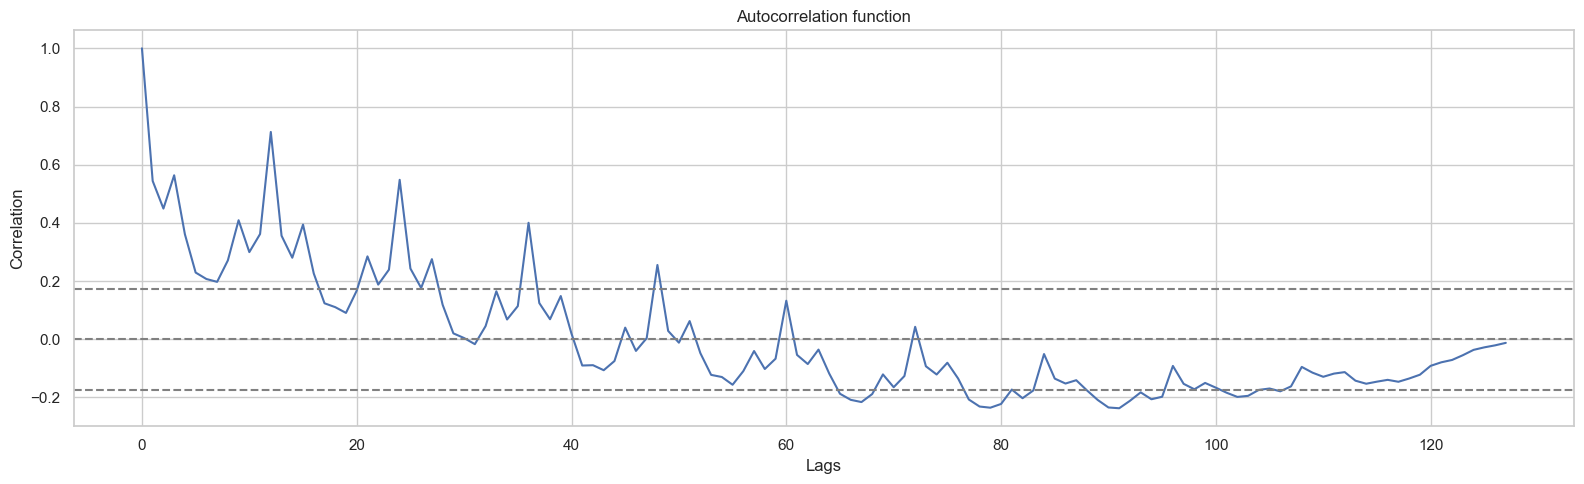

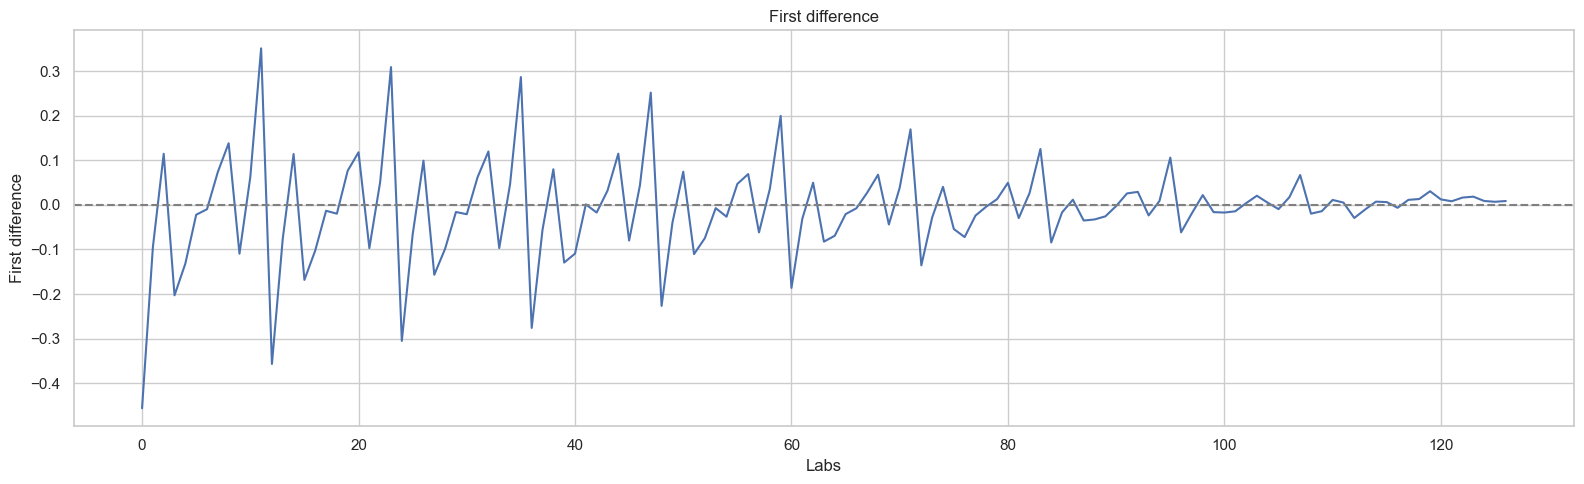

In [4]:
find_seasonality("_arrivals_from_australia_monthly", 1, 140)

---

## Births and deaths

### Male live births

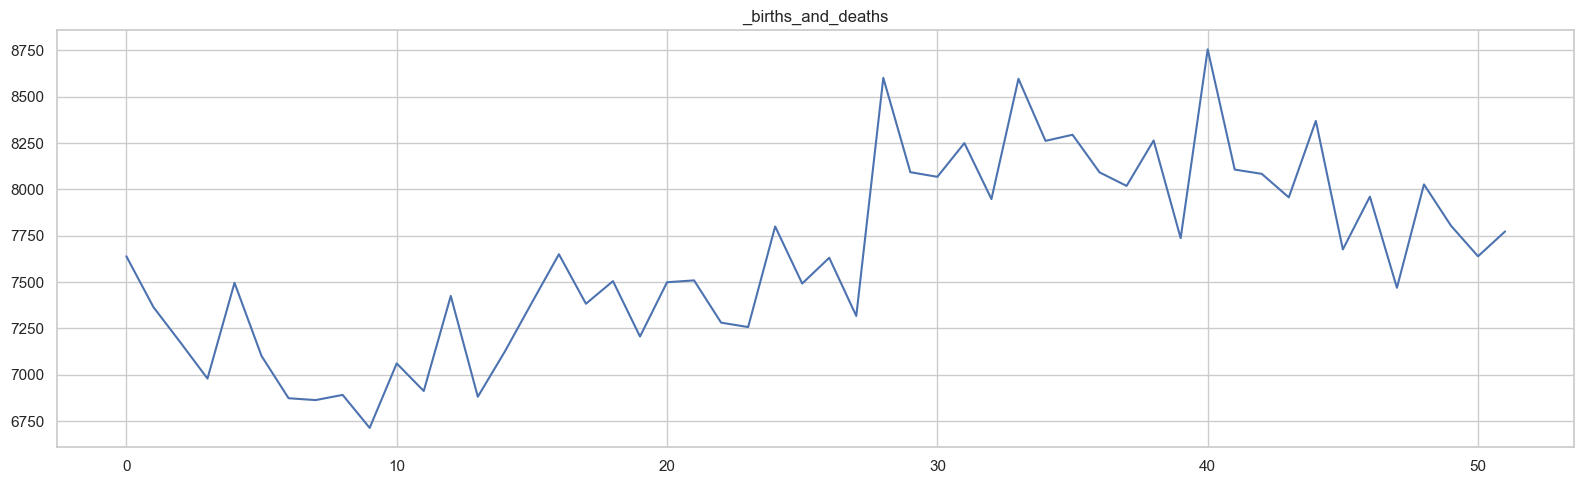

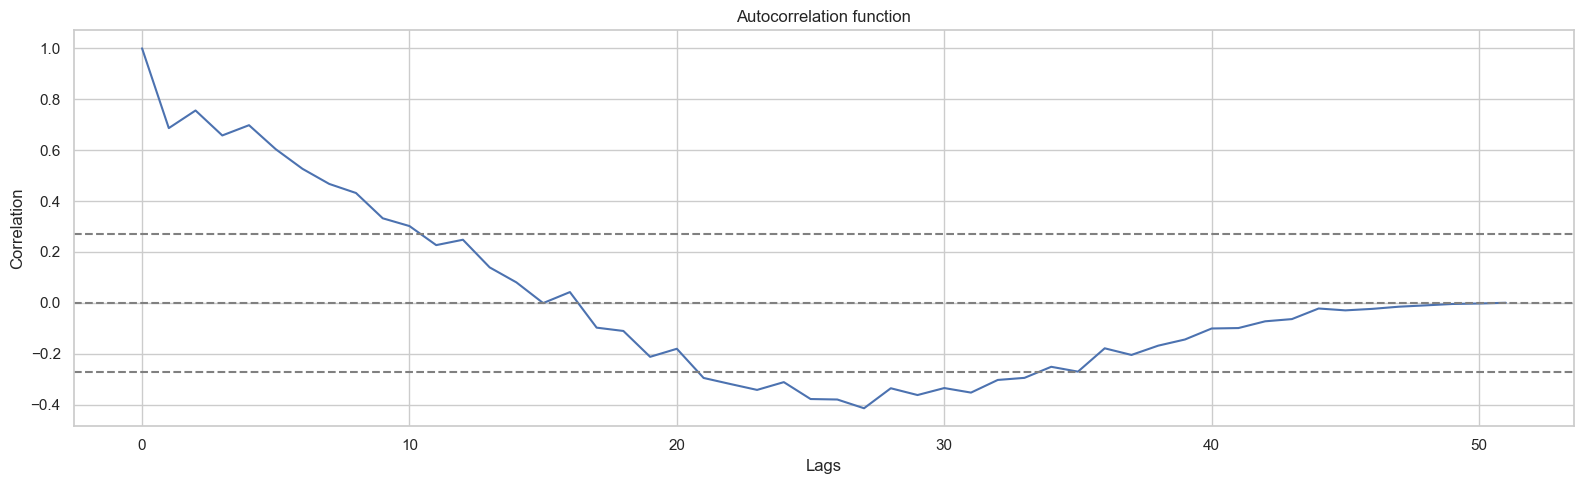

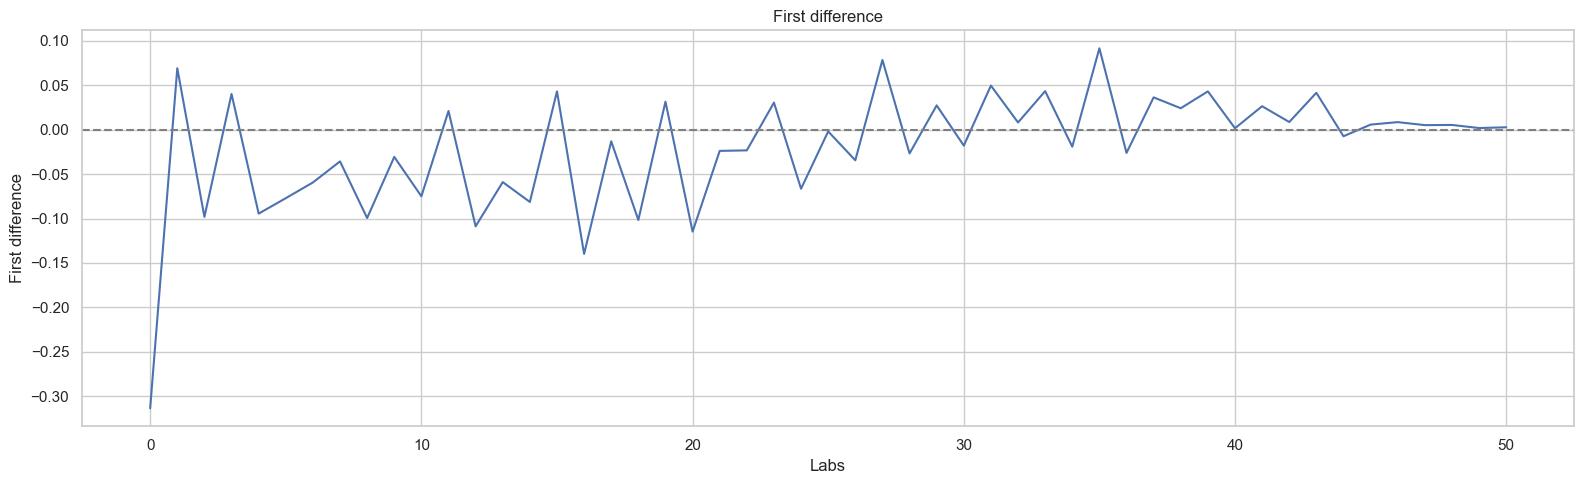

In [5]:
find_seasonality("_births_and_deaths", 1, 60)

### Female live births

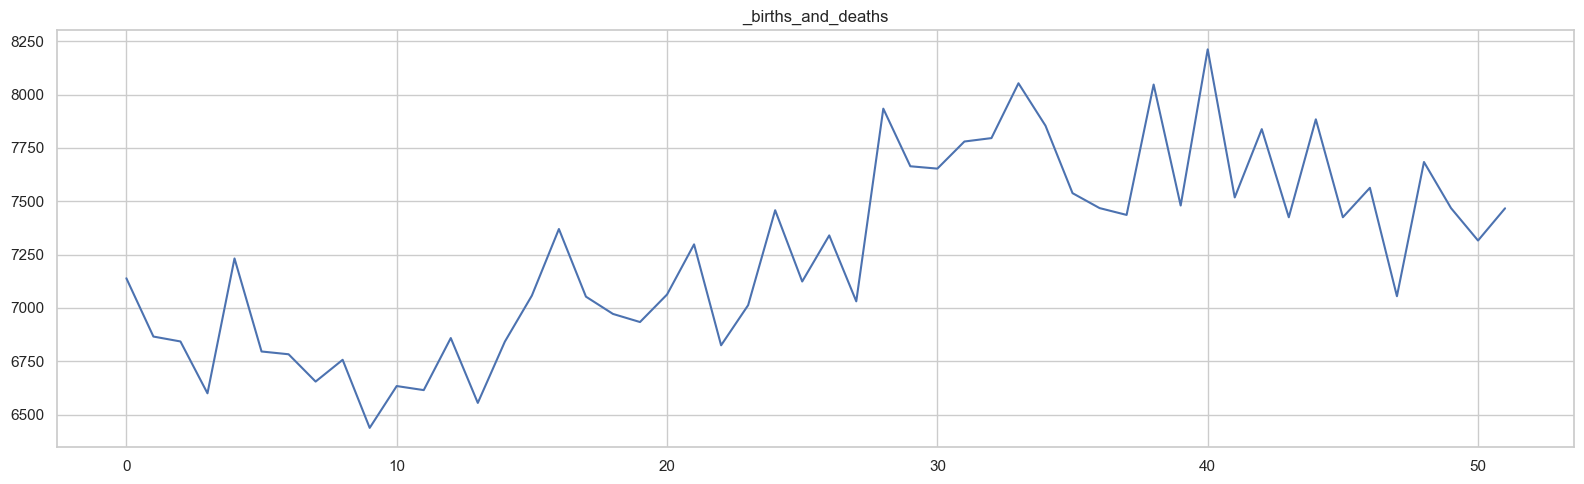

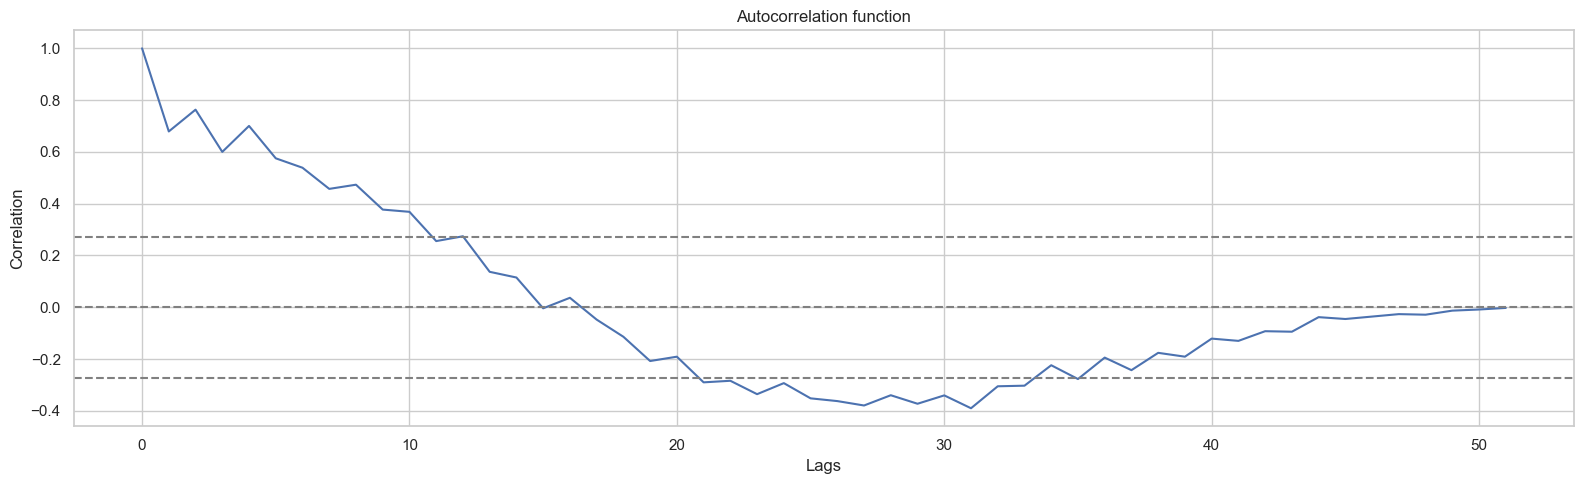

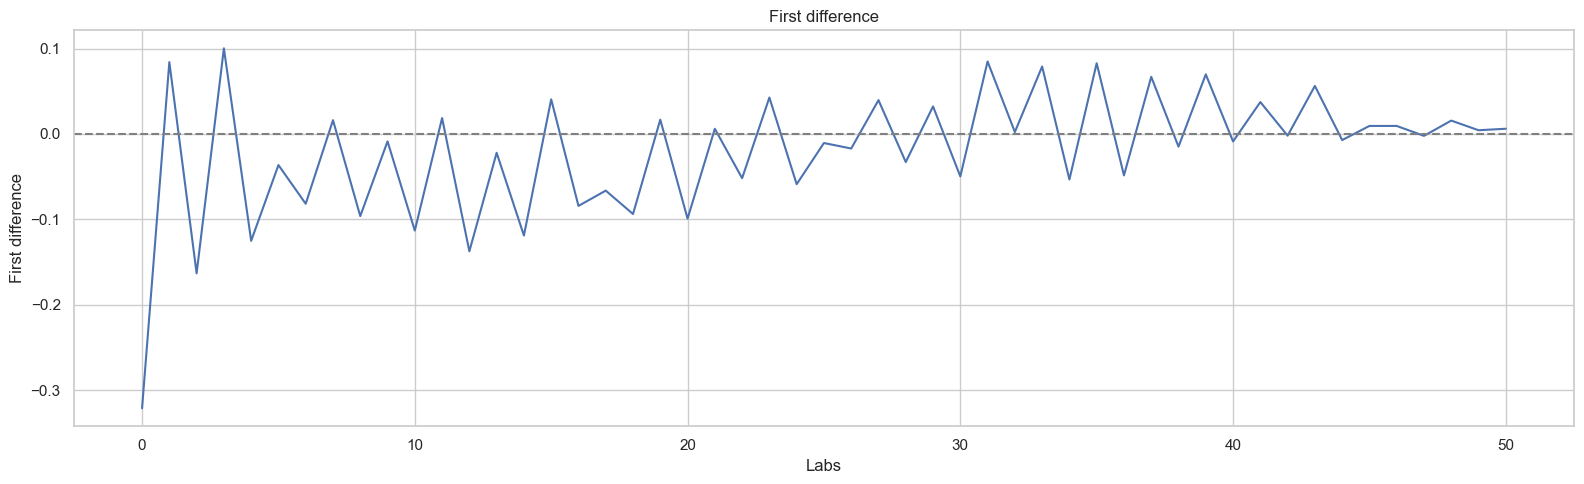

In [6]:
find_seasonality("_births_and_deaths", 2, 60)

### Male deaths

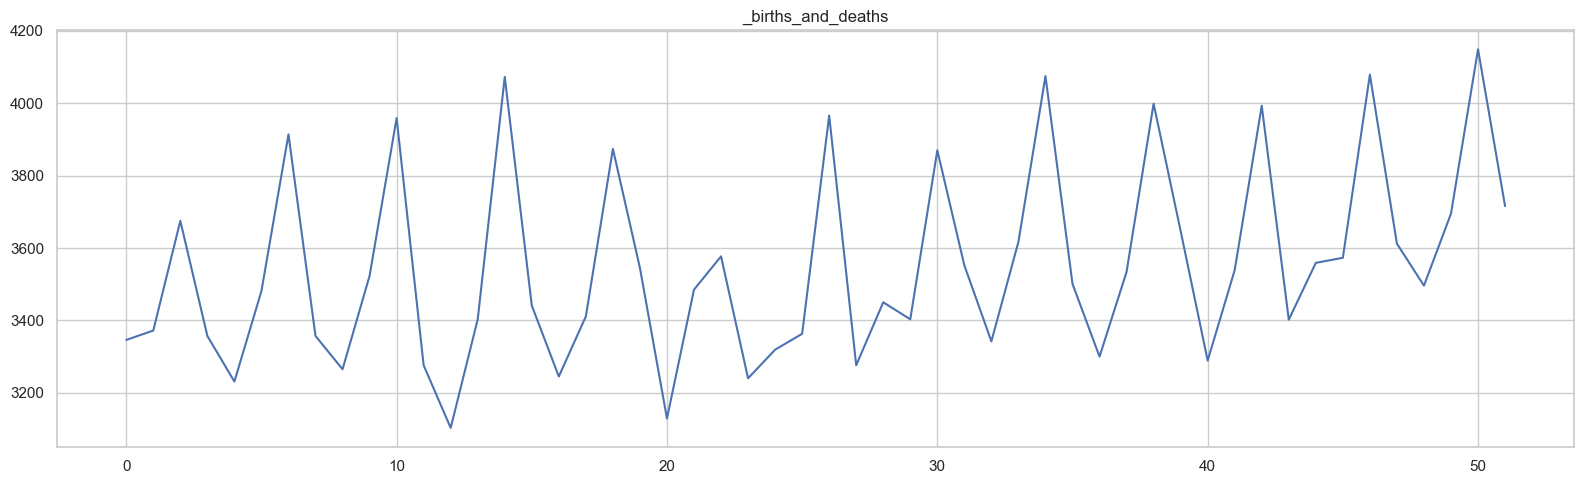

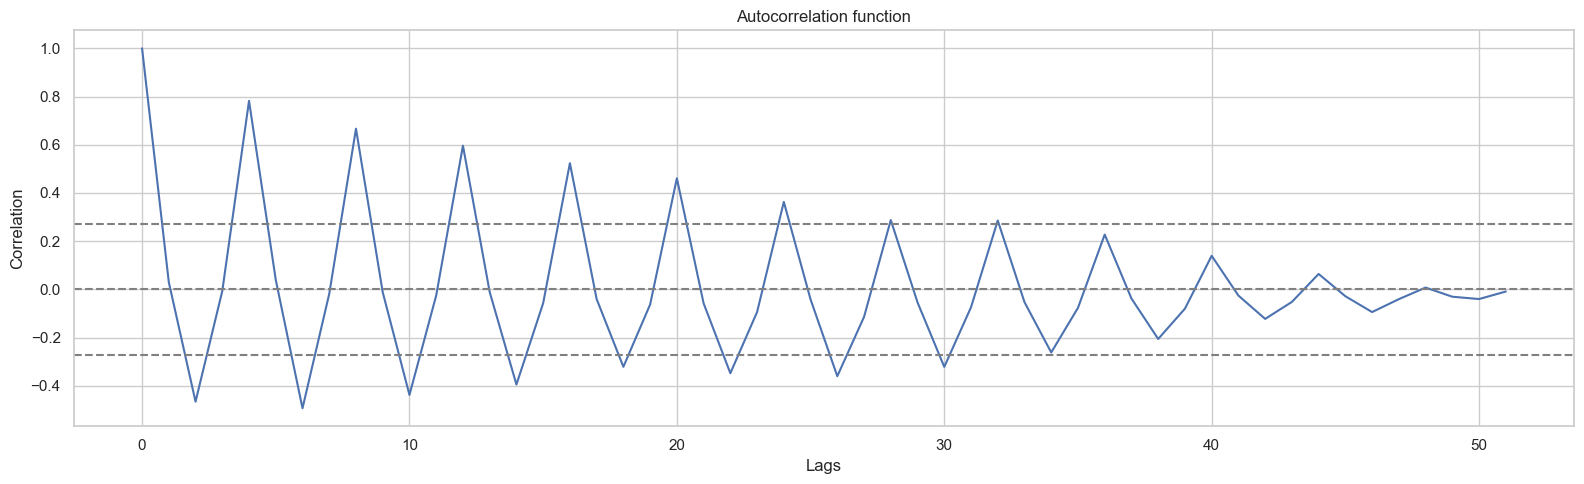

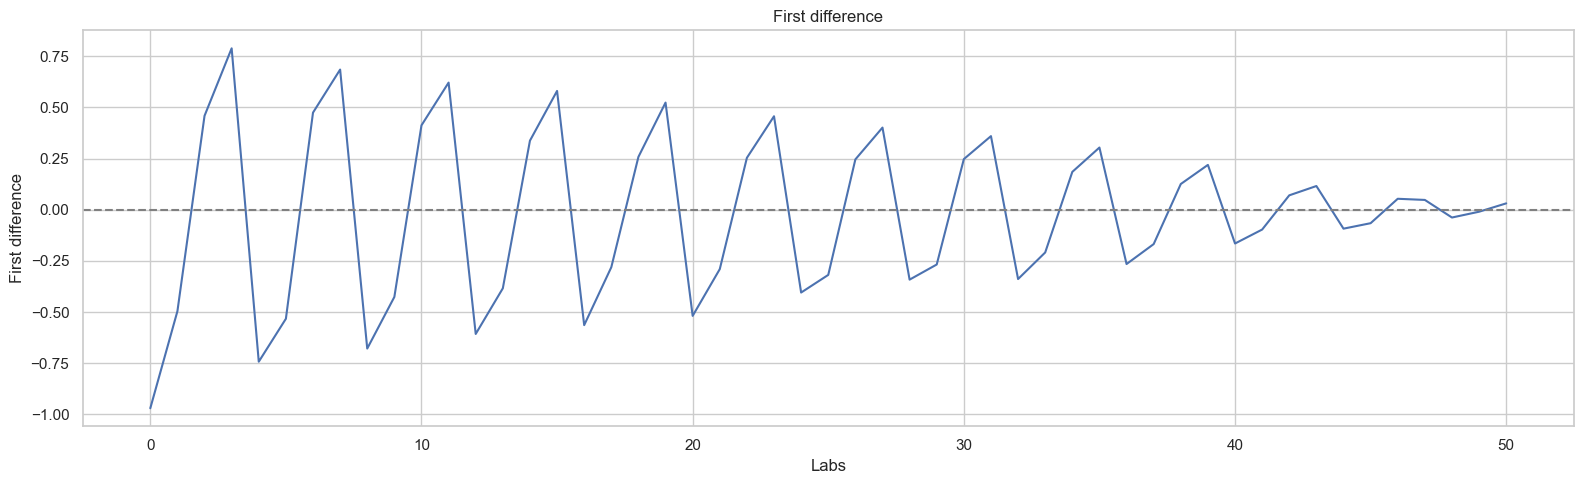

In [7]:
find_seasonality("_births_and_deaths", 3, 60)

### Female deaths

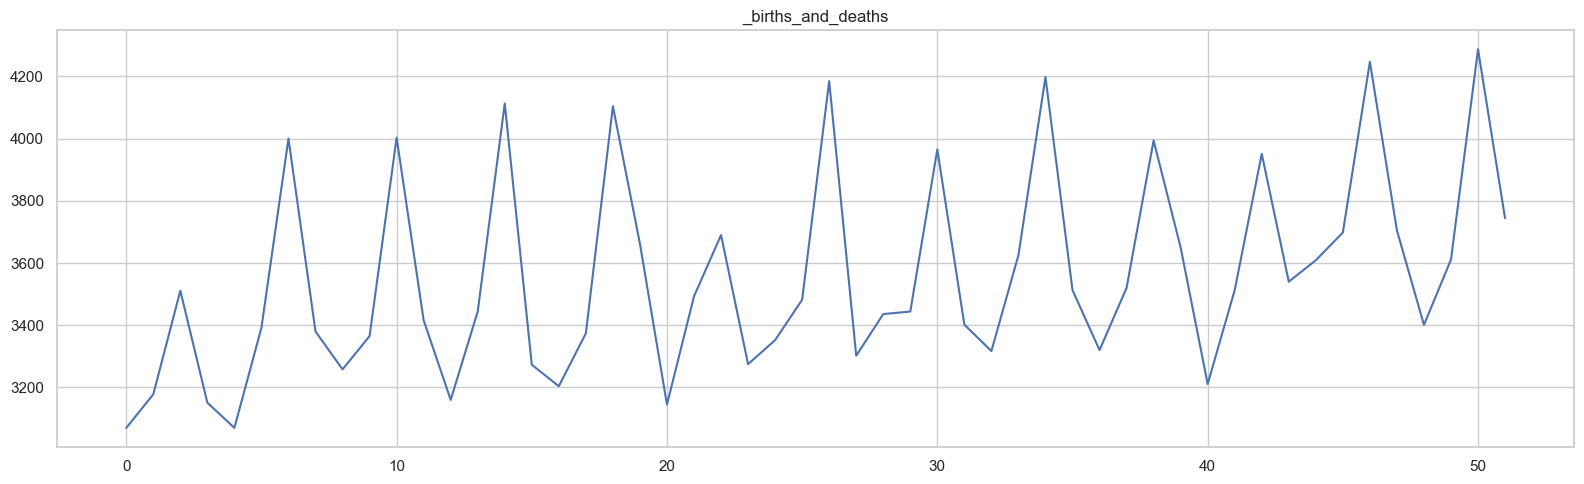

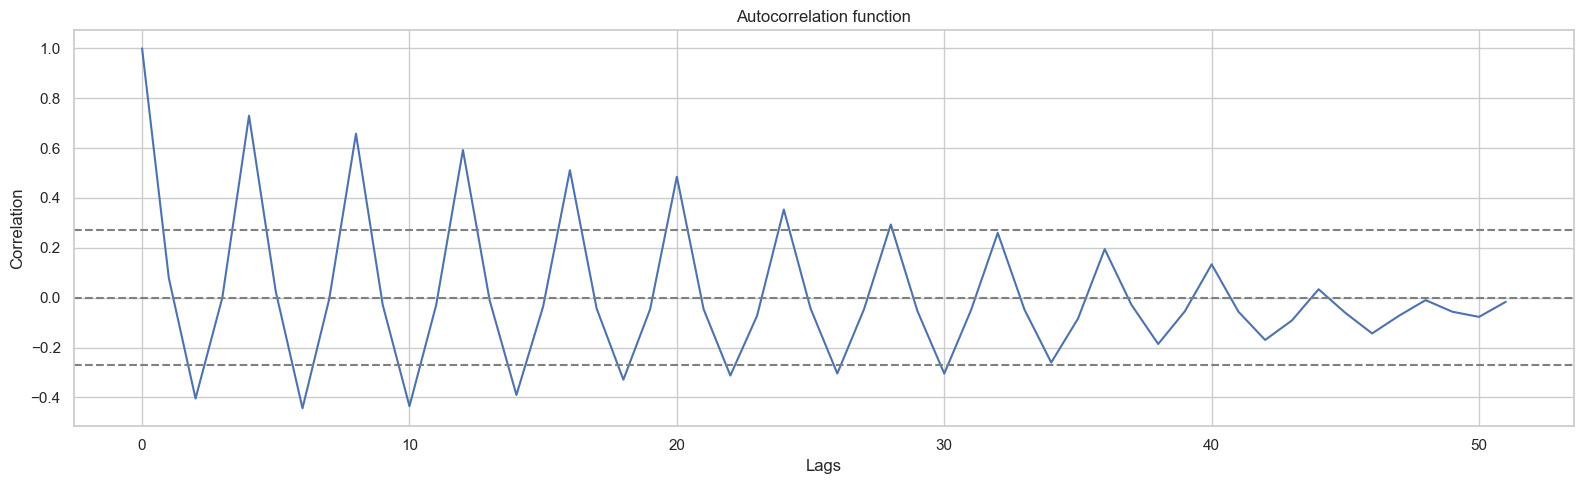

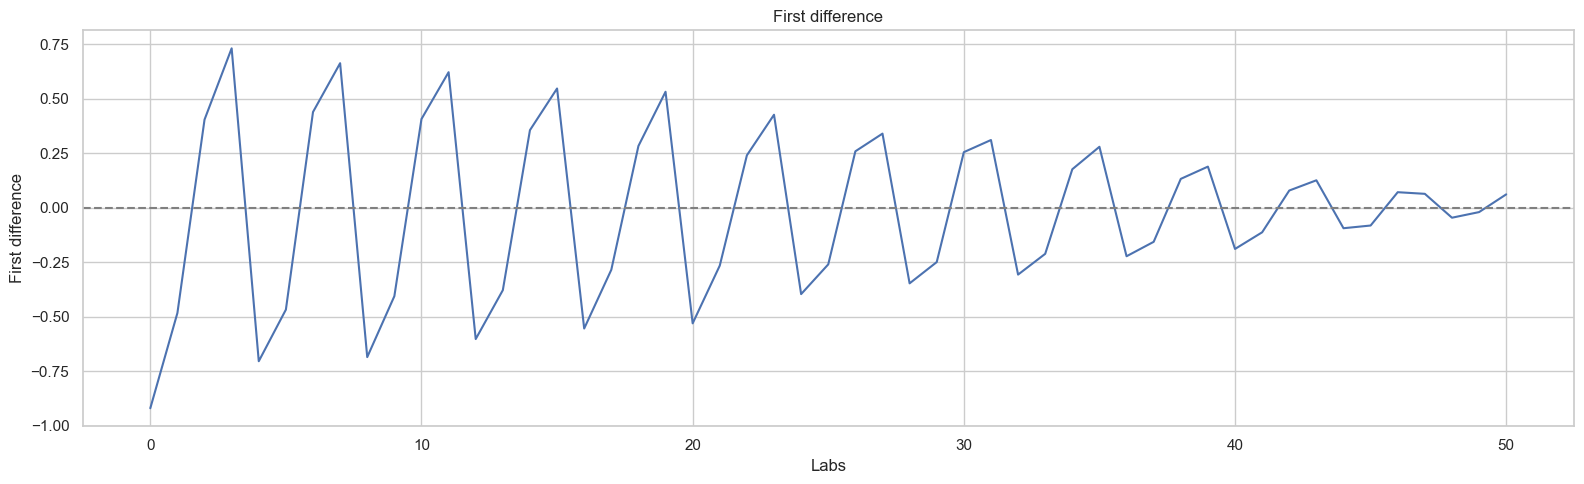

In [8]:
find_seasonality("_births_and_deaths", 4, 60)

---

## Forestry

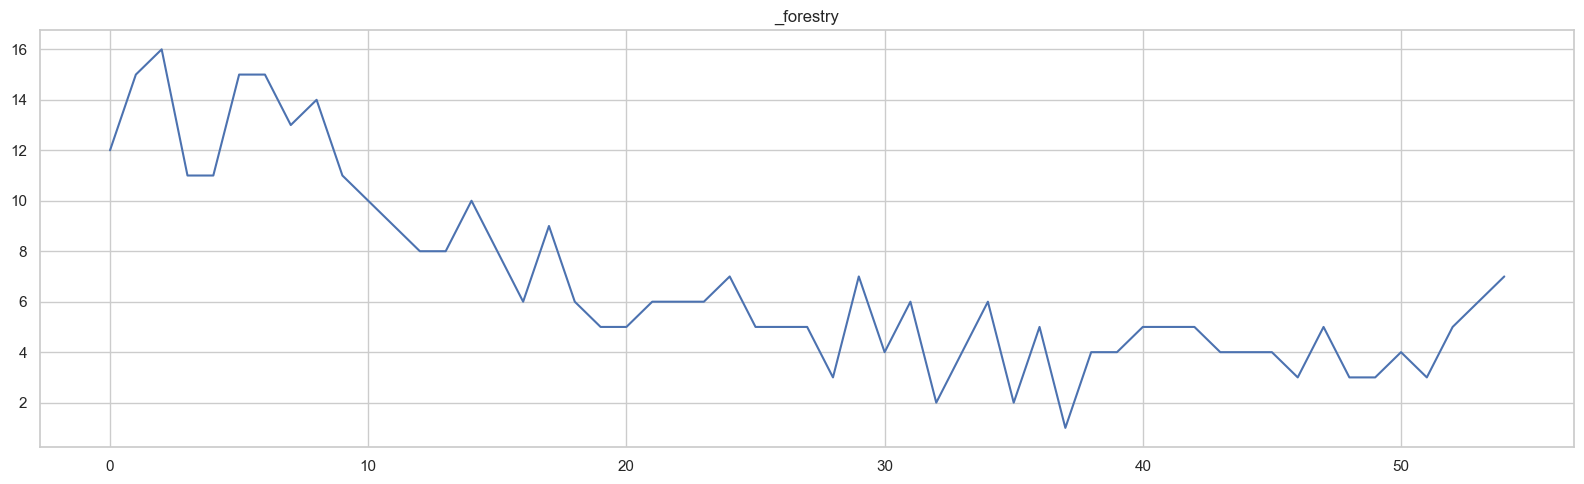

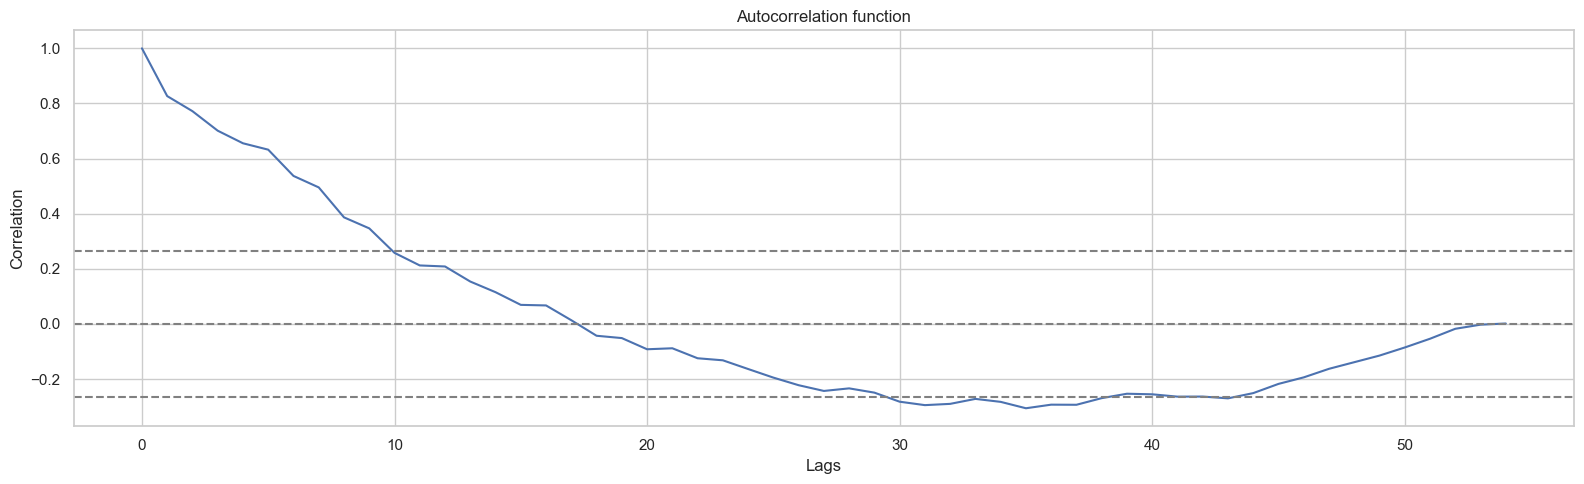

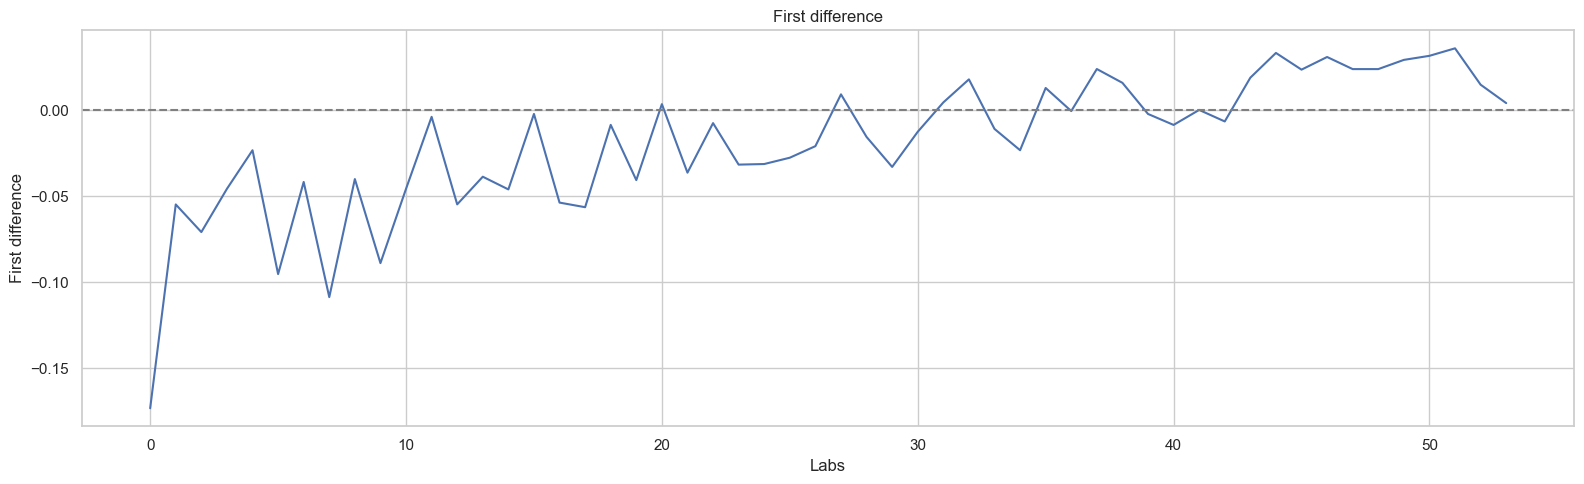

In [9]:
find_seasonality("_forestry", 1, 60)

---

## Imports

### Total Airports CIF

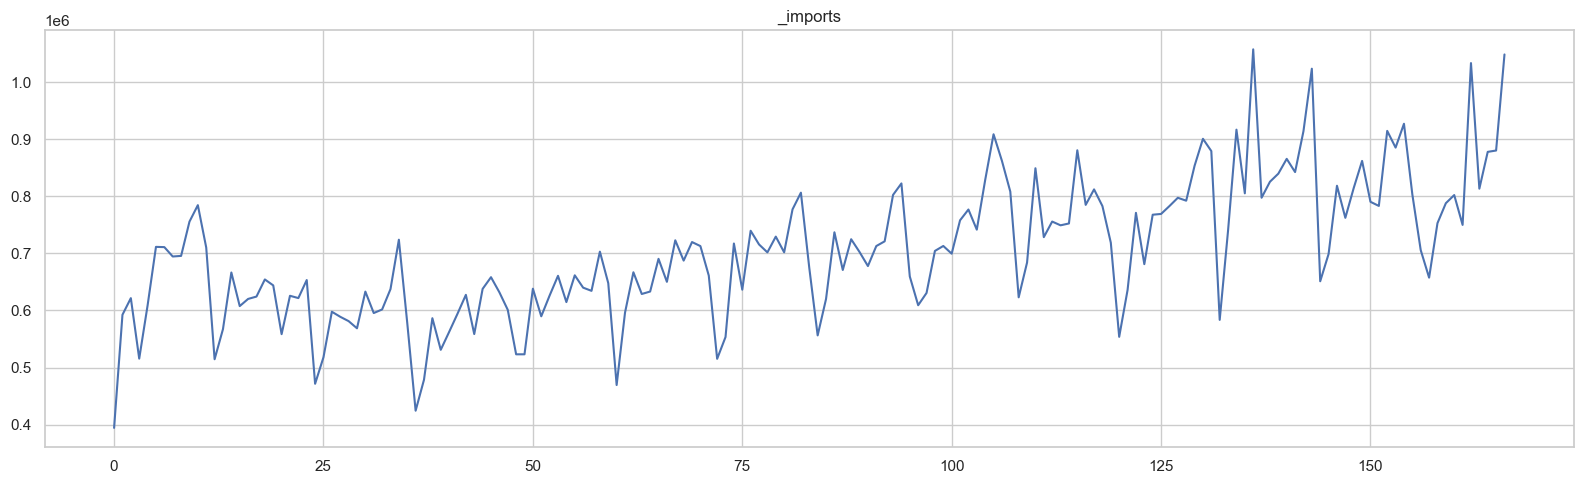

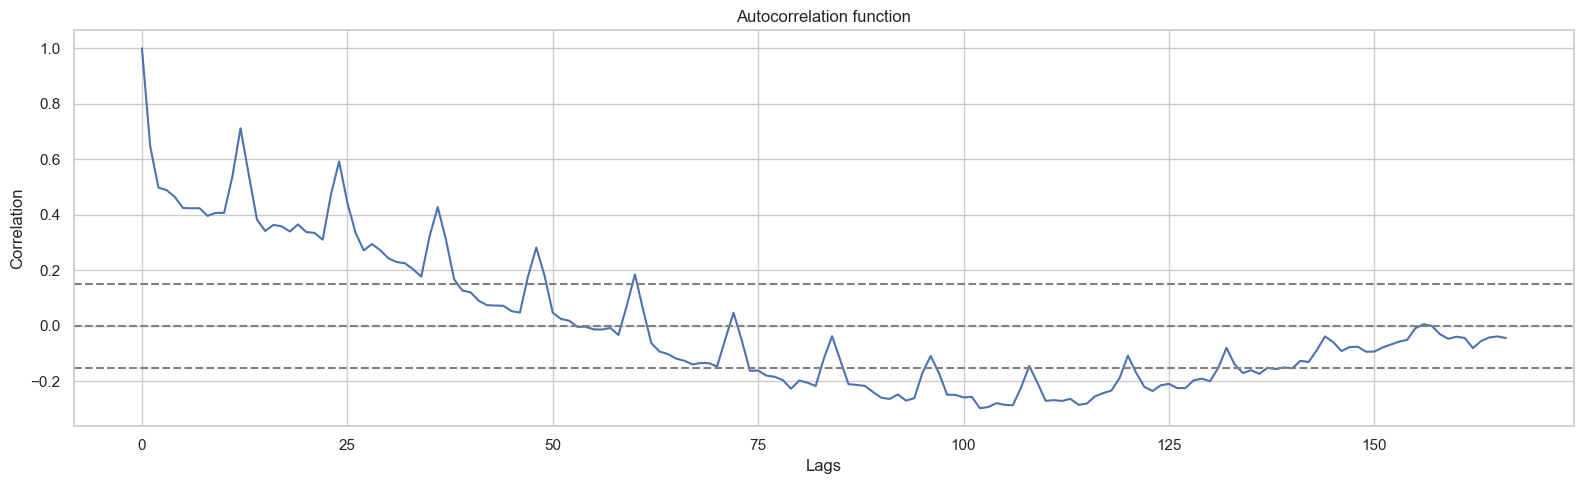

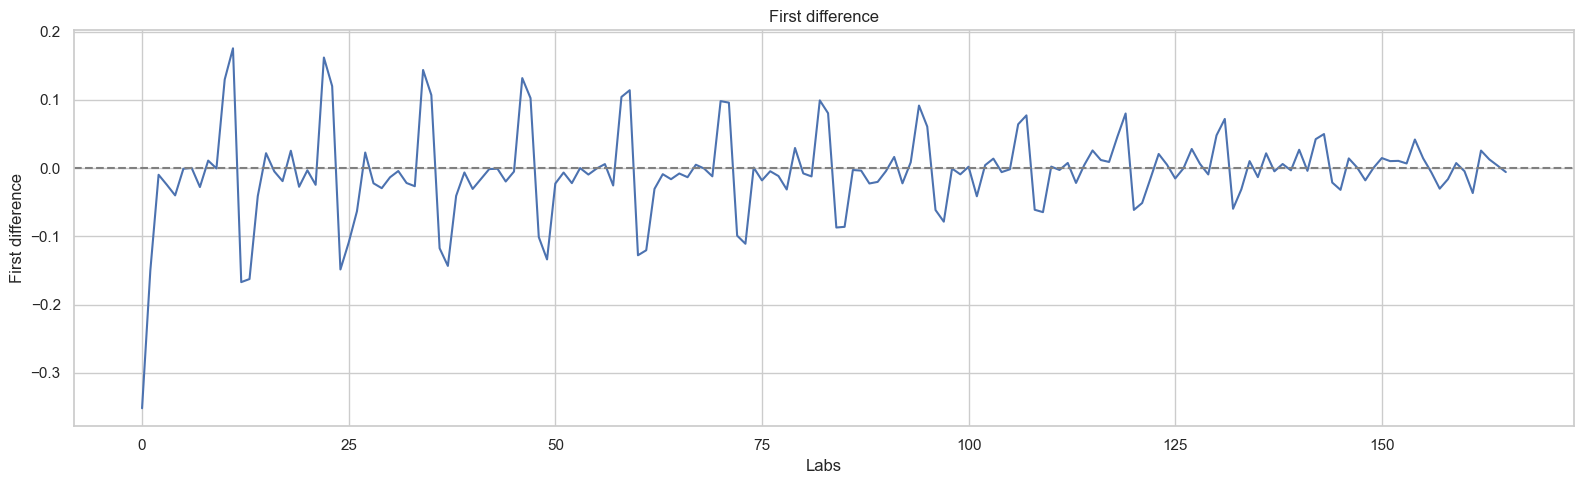

In [10]:
find_seasonality("_imports", 1, 200)

### Total Parcel Post CIF

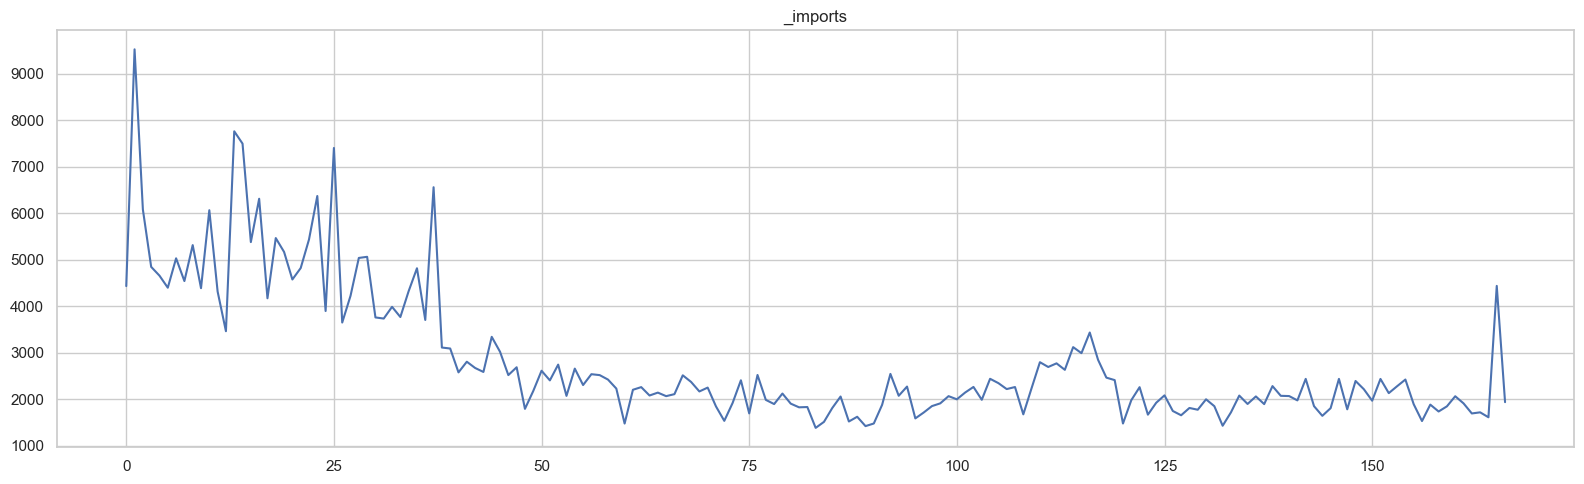

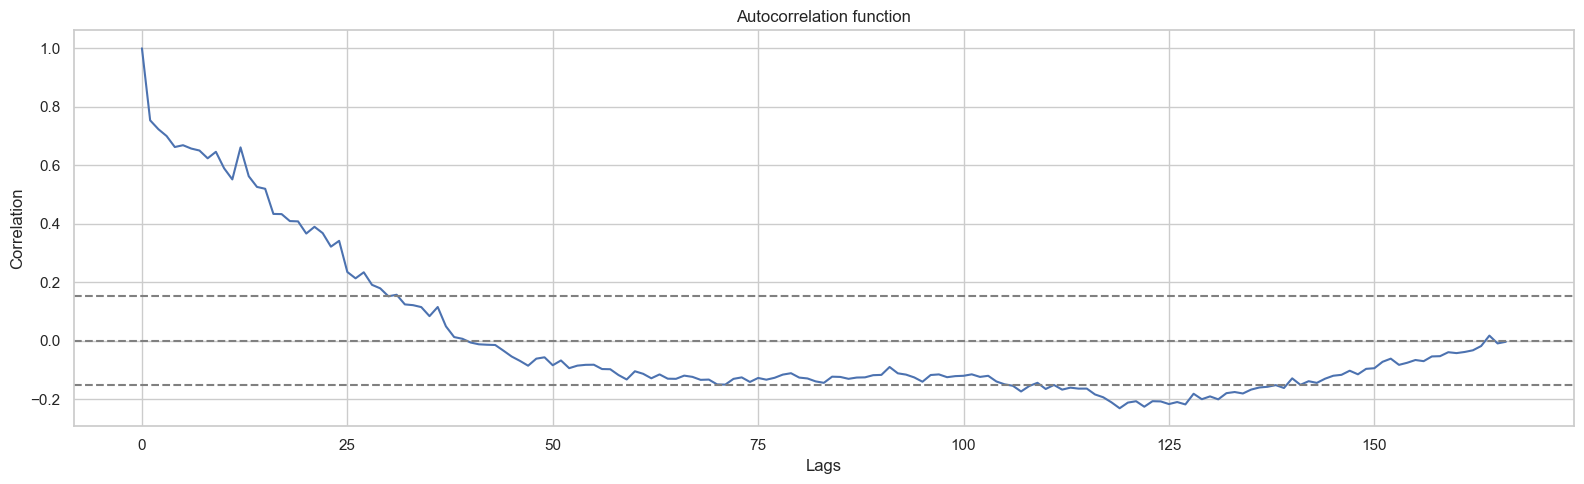

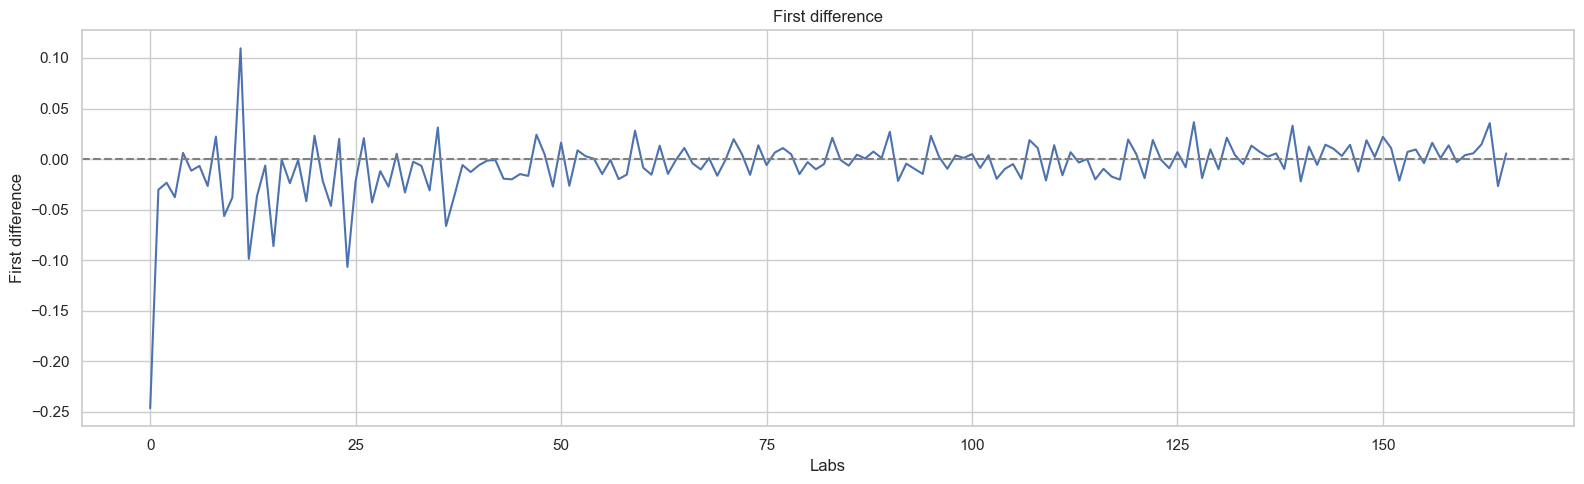

In [11]:
find_seasonality("_imports", 2, 200)

### Total Seaports CIF

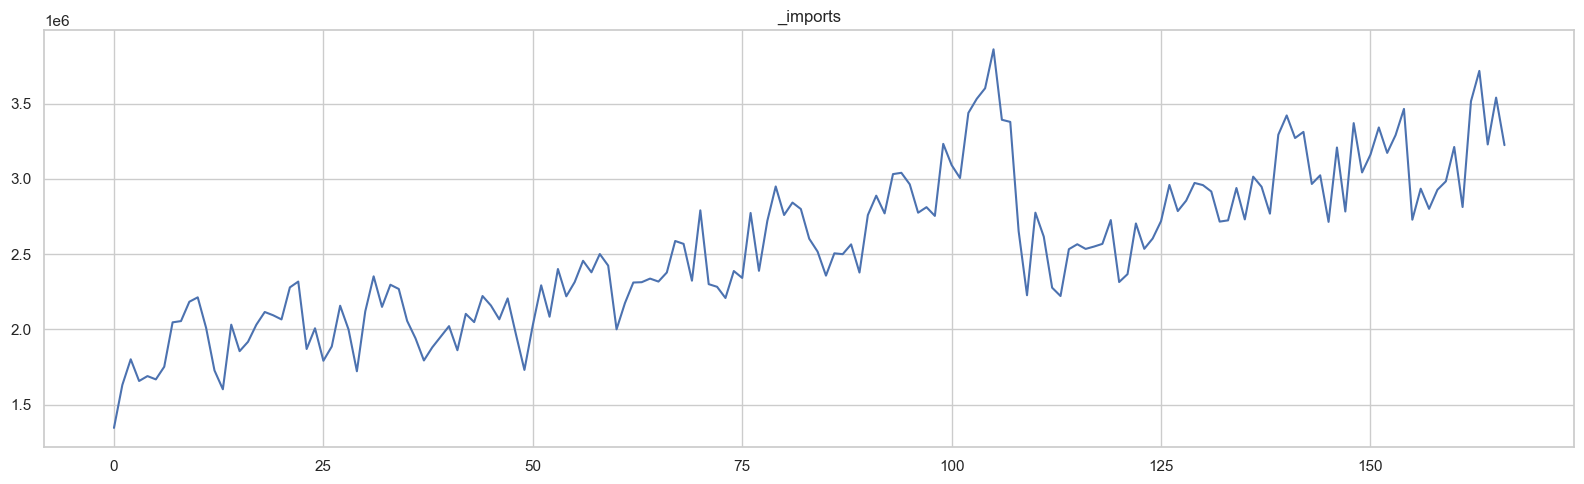

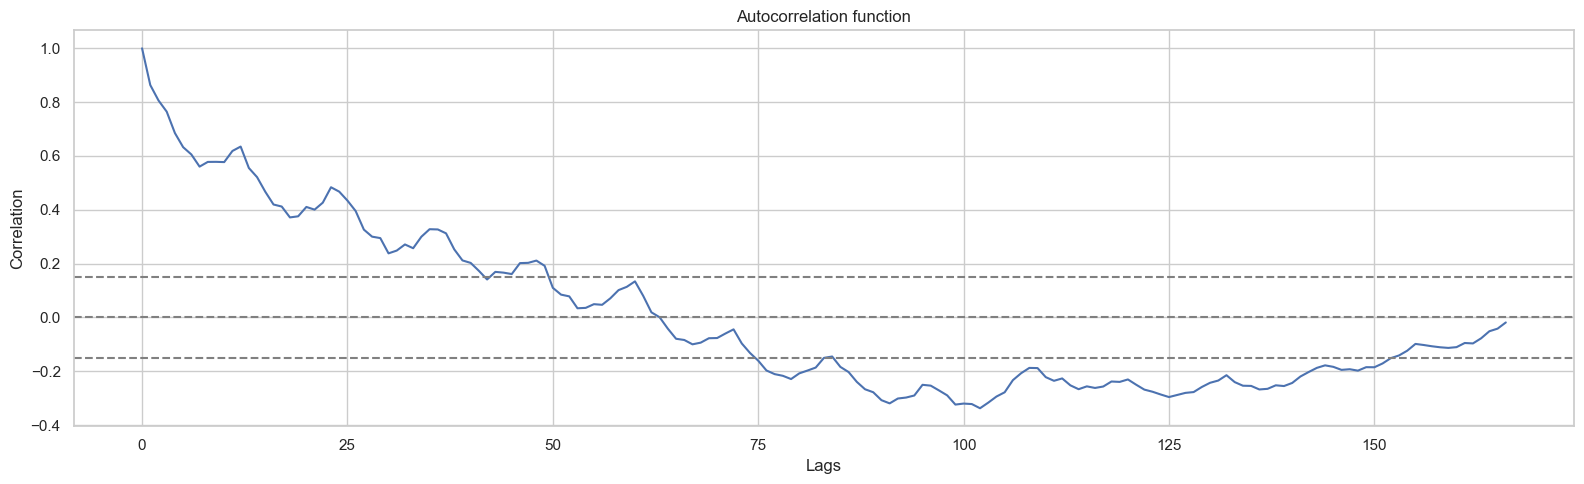

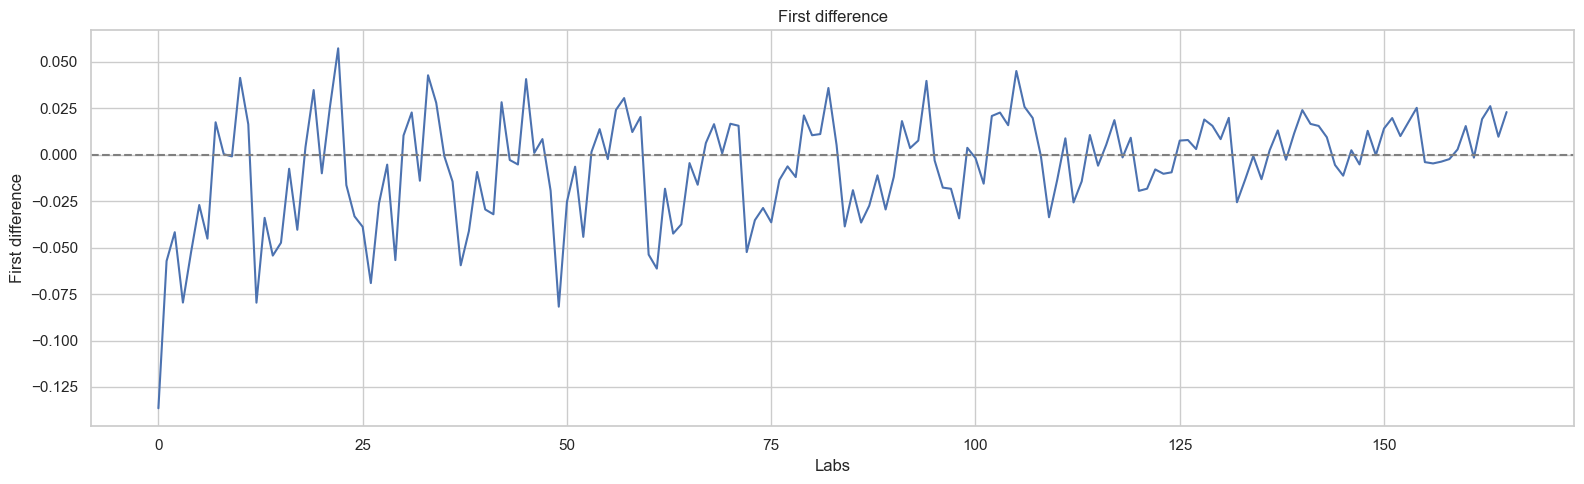

In [12]:
find_seasonality("_imports", 3, 200)

### Total Airports Weight

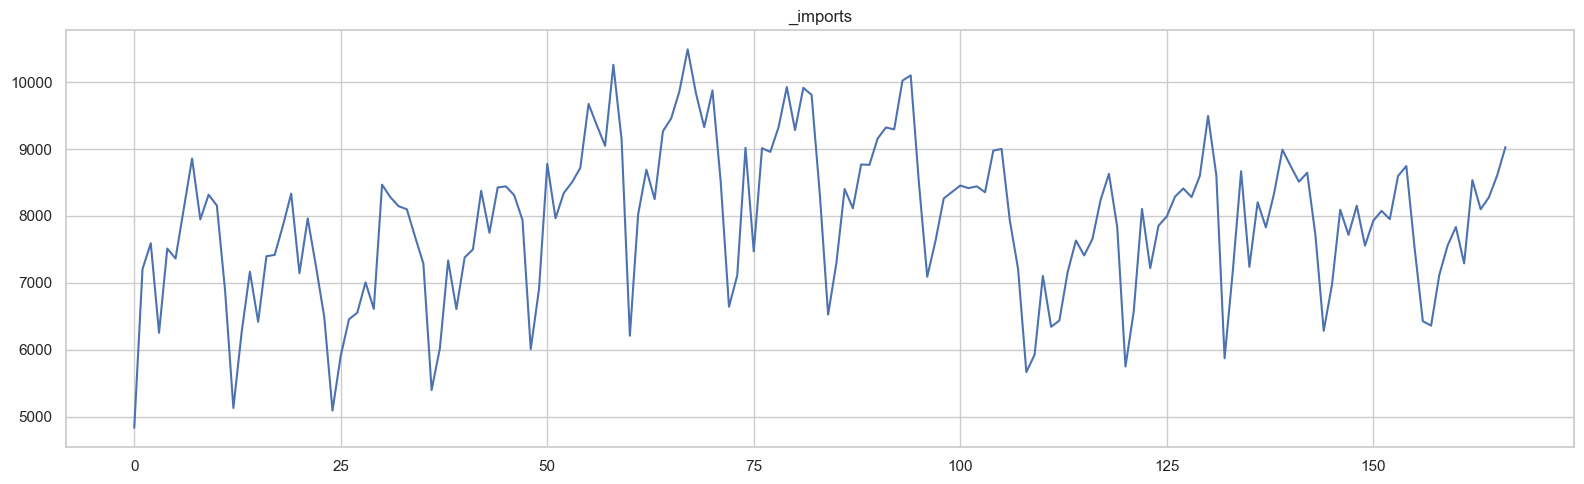

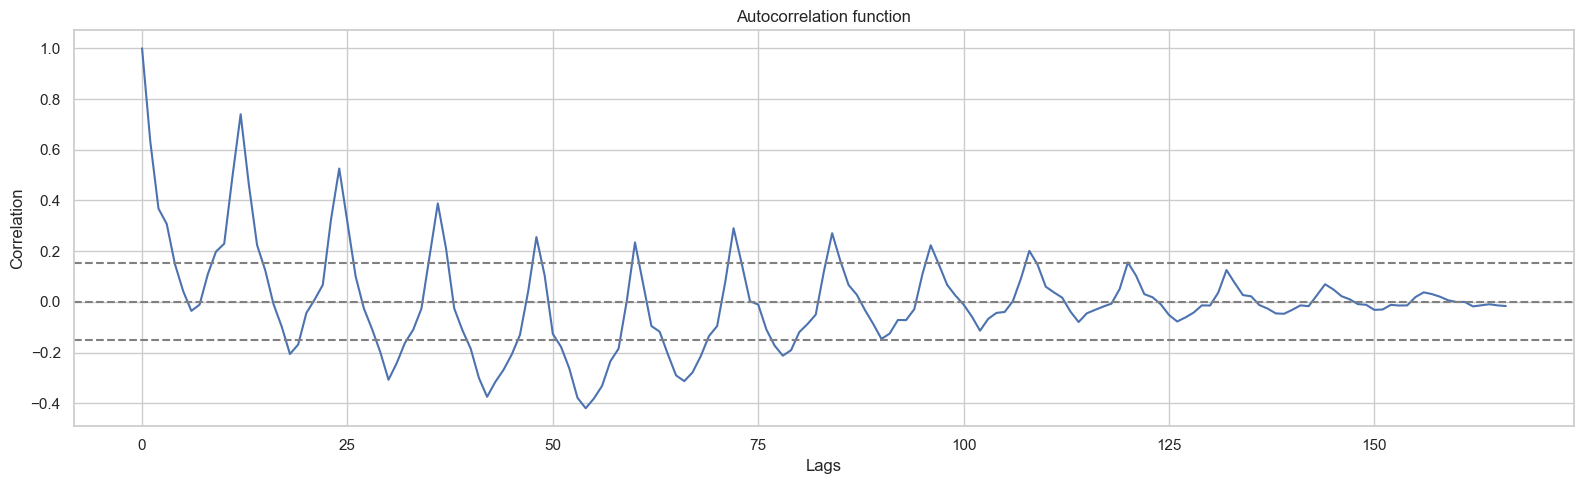

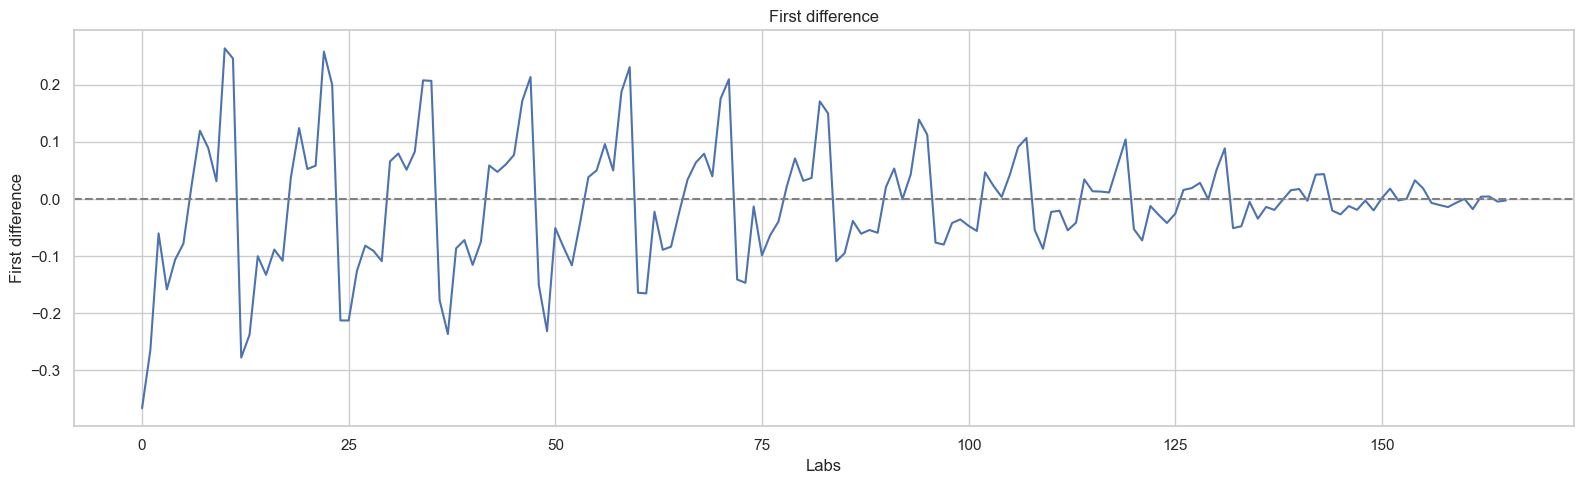

In [13]:
find_seasonality("_imports", 4, 200)

### Total Parcel Post Weight

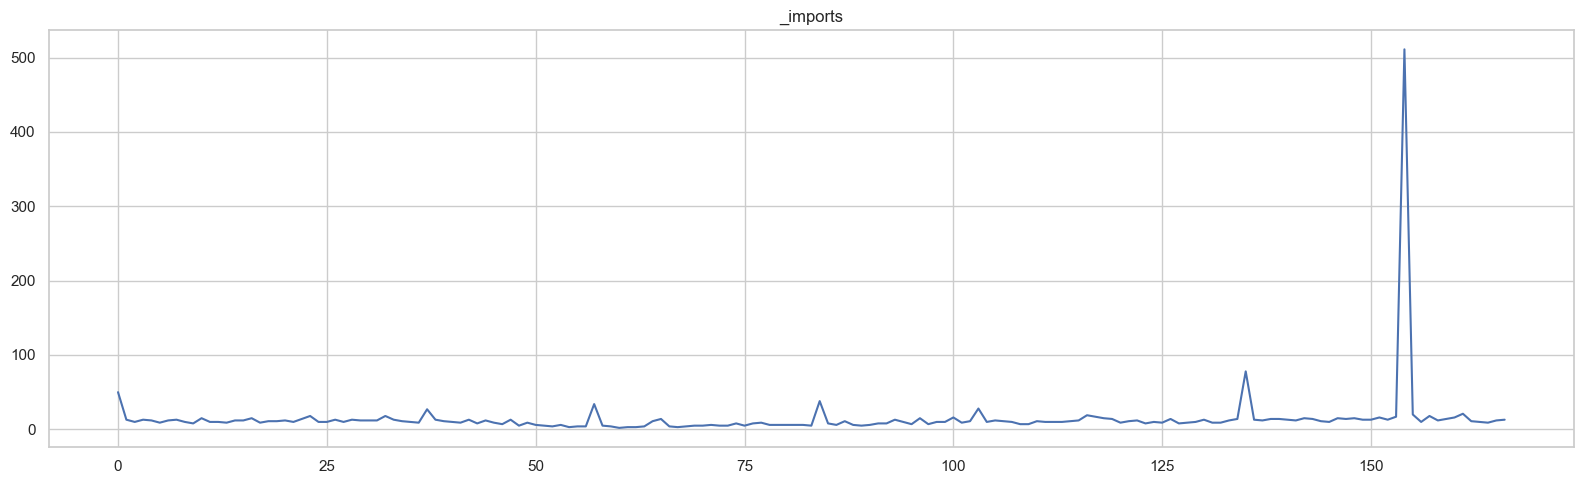

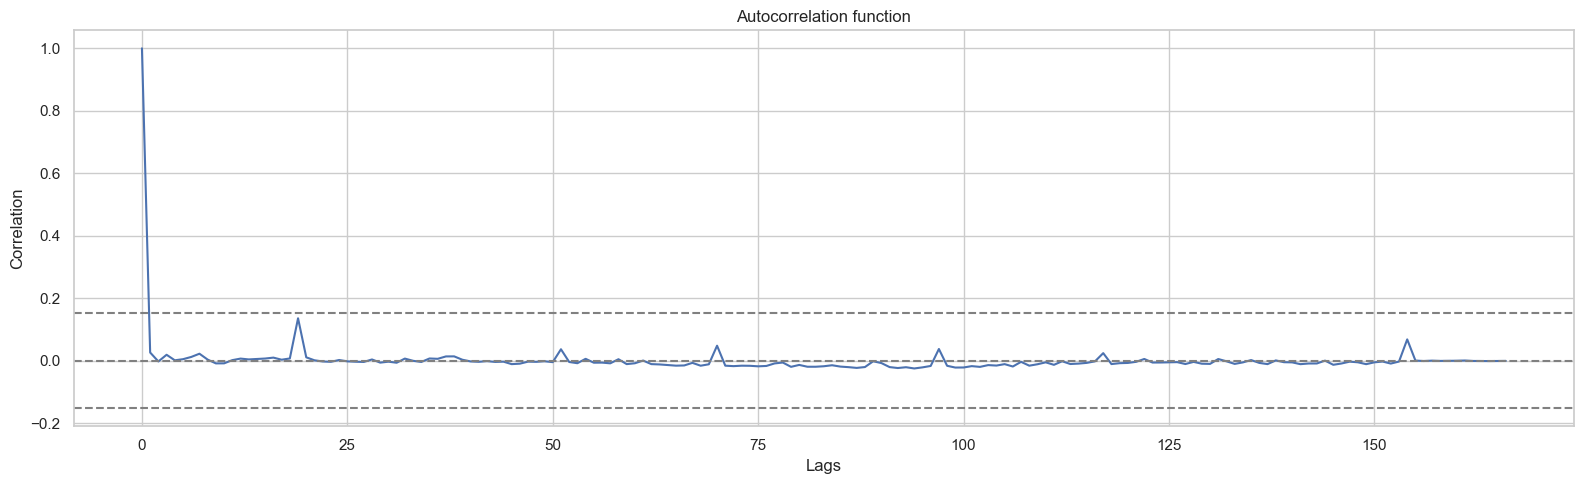

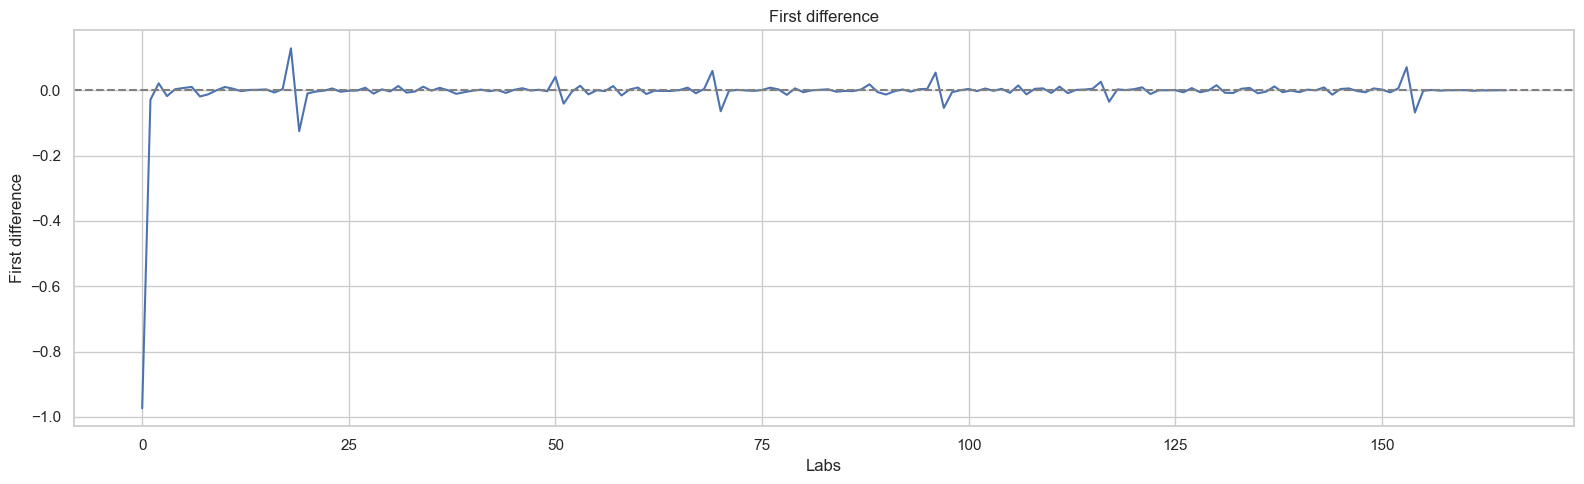

In [14]:
find_seasonality("_imports", 5, 200)

### Total Seaports Weight

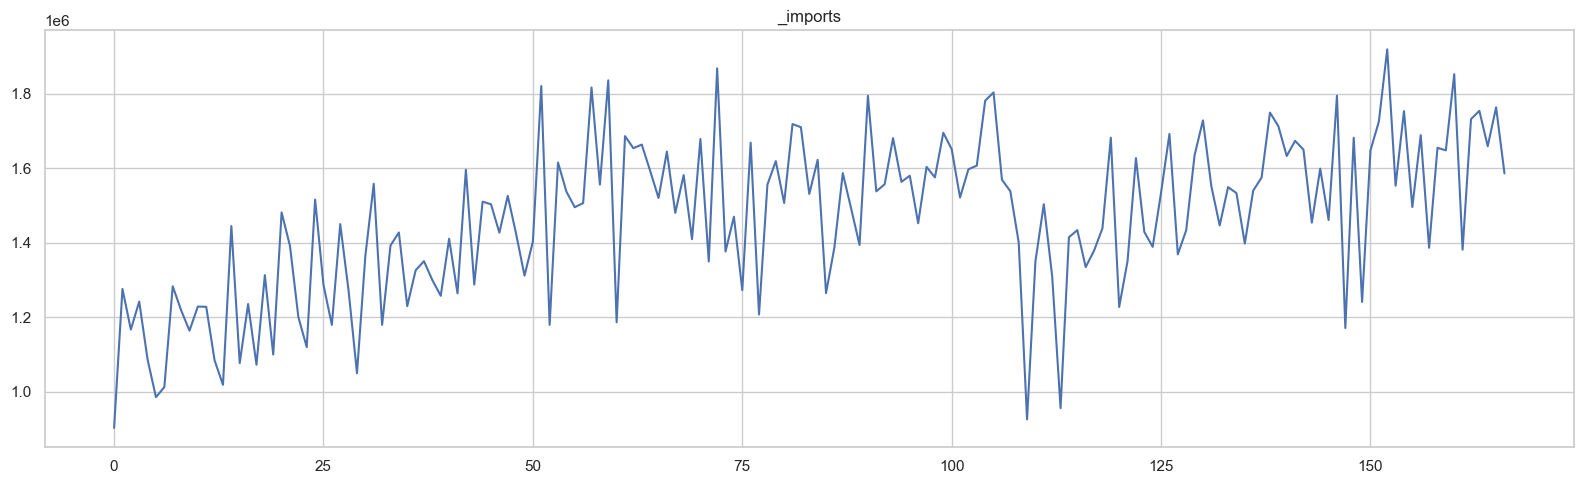

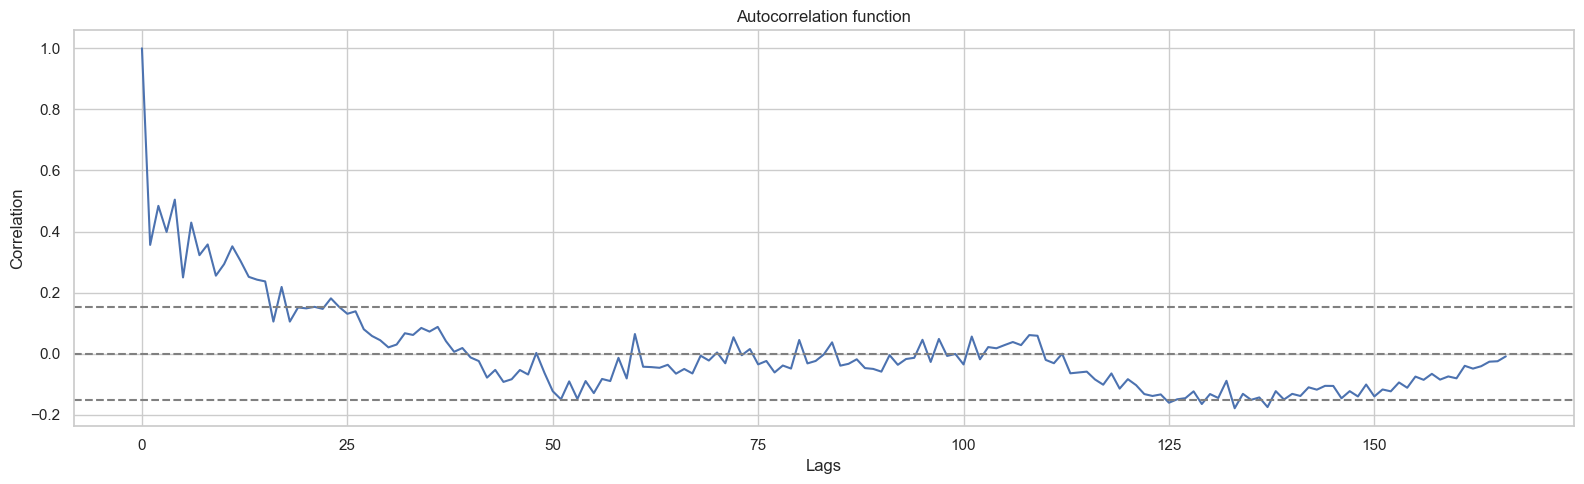

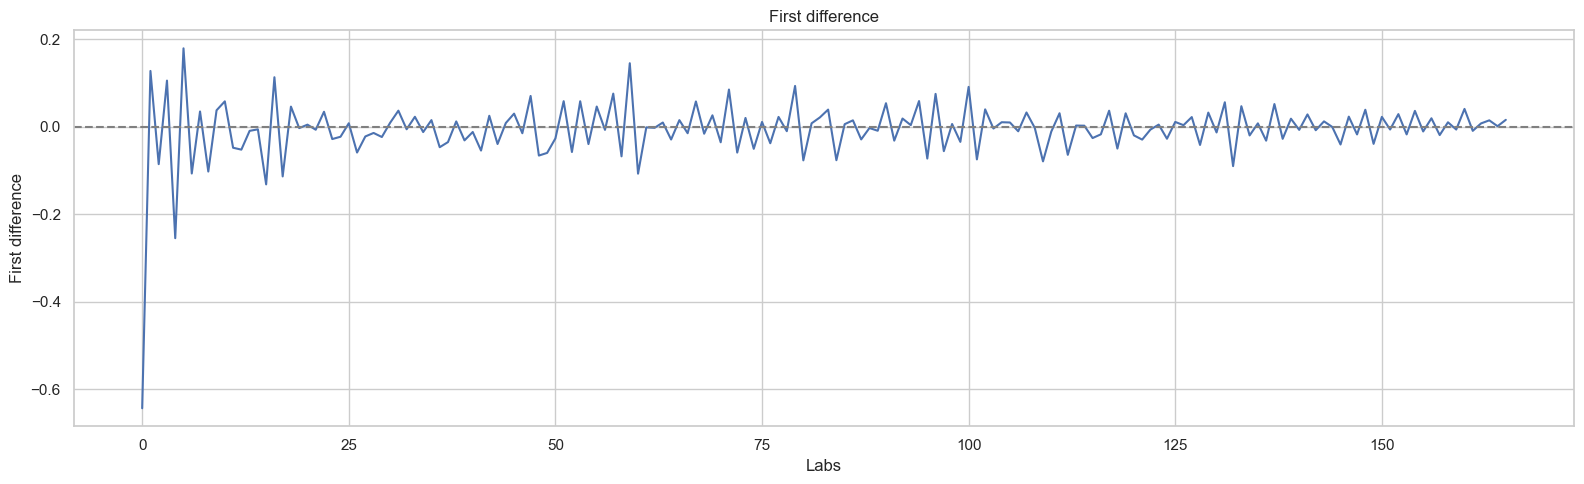

In [15]:
find_seasonality("_imports", 6, 200)

---

## Sea ice

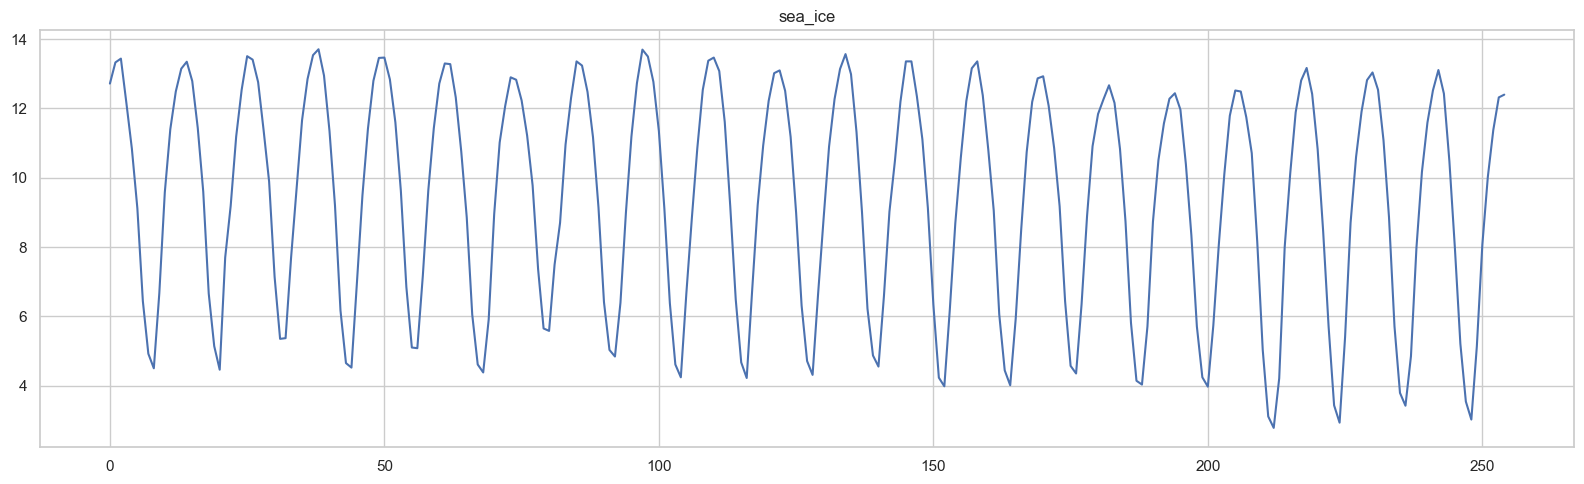

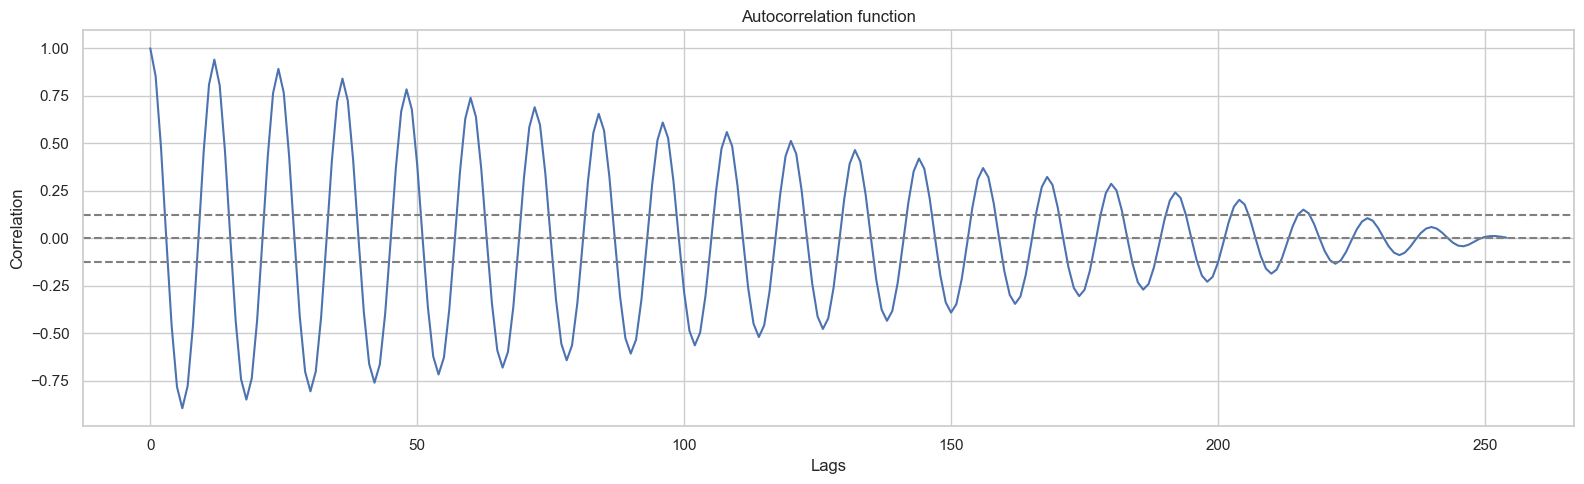

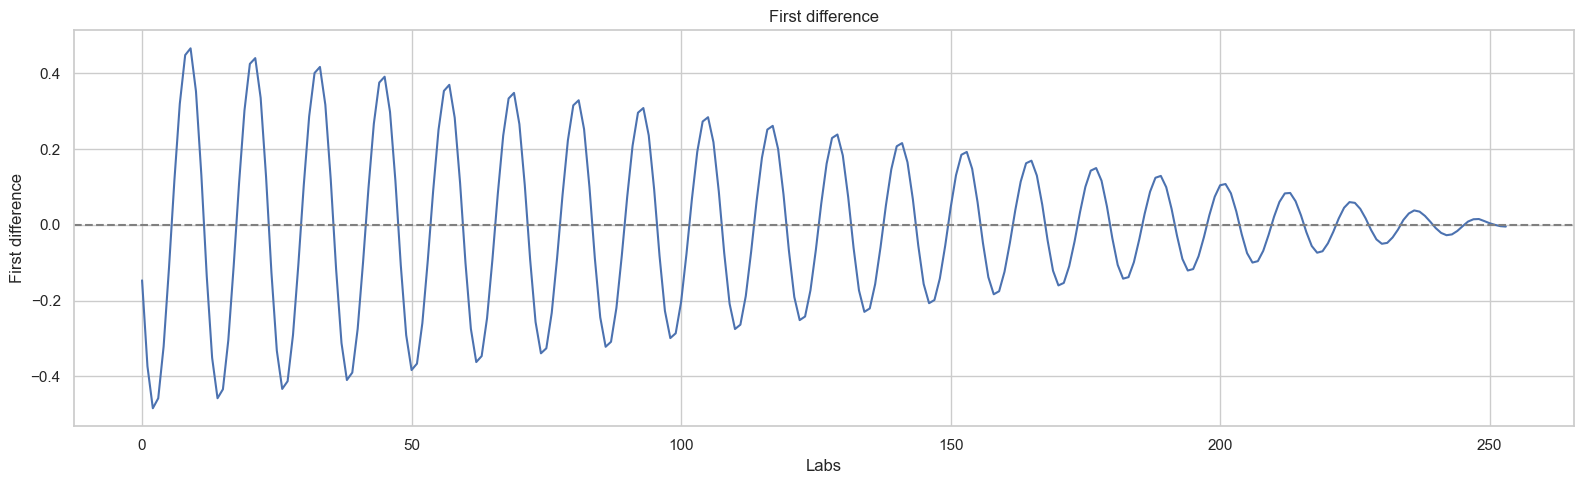

In [16]:
find_seasonality("sea_ice", 1, 260)